In [ ]:
Asset Allocation Project

In [11]:
try:
    from scipy.optimize import minimize
    print("module 'scipy' is installed")
except ModuleNotFoundError:
    print("module 'scipy' is not installed -- trying to install ...")
    %pip install scipy
    
try:
    import pandas as pd
    print("module 'pandas' is installed")
except ModuleNotFoundError:
    print("module 'pandas' is not installed -- trying to install ...")
    %pip install pandas 
    
try:
    import matplotlib.pyplot as plt
    print("module 'matplotlib' is installed")
except ModuleNotFoundError:
    print("module 'matplotlib' is not installed -- trying to install ...")
    %pip install matplotlib

module 'scipy' is installed
module 'pandas' is installed
module 'matplotlib' is installed


In [12]:
## Please make sure all packages are installed before running
# some of the un-necessary packaegs are commented out
# you can uncomment if you have them installed

#import yfinance as yf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
import time
#import seaborn as sns # seaborn is only used to make charts look better
#sns.set_theme()

# Load Data

In [13]:
## Important: From 2023, Yahoo Finance starts to encrypt the data, so yfinance package may not work for now
## Please use the saved return pkl file instead

reload_data = 0
tickers = "^GSPC VNQ VGK VPL EEM AGG JNK GC=F"
if reload_data:
    data = yf.download(tickers, start="1990-01-01", end="2023-1-16",
                       group_by="ticker")
    
    names = {}
    for i in tickers.split(' '):
        ticker_data = yf.Ticker(i)
        print(i, ticker_data.info['shortName'], ticker_data.info['currency'])
        names[i] = ticker_data.info['shortName']
        
        
    data = data.loc[:,  pd.IndexSlice[:, 'Adj Close']]
    data.columns = data.columns.droplevel(1)
    data = data.rename(names, axis = 1)
    data.to_pickle('8-9_Live_return_data.pkl')
else:
    try:
        data = pd.read_pickle('8-9_Live_return_data.pkl')
    except: # for old python versions, we need pickle5 to load data
        %pip install pickle5
        with open('8-9_Live_return_data.pkl', "rb") as fh:
            data = pickle.load(fh)

In [14]:
data

,Gold Feb 23,SPDR Bloomberg High Yield Bond,Vanguard Real Estate ETF,Vanguard FTSEEuropean ETF,Vanguard FTSE Pacific ETF,iShares Core U.S. Aggregate Bon,iShares MSCI Emerging Index Fun,S&P 500
Date,,,,,,,,
1990-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.690002
1990-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.760010
1990-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.670013
1990-01-05 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.200012
1990-01-08 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.790009
...,...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,1872.699951,92.839996,84.400002,58.570000,65.900002,99.339996,40.369999,3892.090088
2023-01-10 00:00:00-05:00,1871.599976,92.720001,84.589996,58.849998,65.720001,98.959999,40.660000,3919.250000
2023-01-11 00:00:00-05:00,1874.599976,93.379997,87.620003,59.270000,66.250000,99.570000,40.830002,3969.610107


# Reformat Data

In [15]:
# convert index to date format
data.index = pd.to_datetime(data.index)
data.index = pd.to_datetime(data.index.date)
# convert freq to weekly
data = data.asfreq('w', method = 'pad')
# convert price to return
asset_returns = data.pct_change()
# remove NA data
asset_returns = asset_returns.dropna(axis = 0)
# rename the fields
name_mapping = {'Gold Feb 23': 'Gold', 
                'Vanguard FTSE Pacific ETF':'Asia Equity',
               'SPDR Bloomberg High Yield Bond ':'High Yield', 
               'iShares MSCI Emerging Index Fun':'EM Equity',
               'iShares Core U.S. Aggregate Bon':'Agg Bond', 'S&P 500':'US Equity',
               'Vanguard FTSEEuropean ETF':'Eur Equity', 'Vanguard Real Estate ETF': 'Real Estate'}
asset_returns = asset_returns.rename(name_mapping, axis = 1)
asset_returns = asset_returns[['Asia Equity','Eur Equity','EM Equity','US Equity',
                 'Real Estate','Gold','High Yield','Agg Bond']]
                

In [16]:
asset_returns

,Asia Equity,Eur Equity,EM Equity,US Equity,Real Estate,Gold,High Yield,Agg Bond
2007-12-16,-0.057921,-0.036785,-0.063301,-0.024398,-0.070594,-0.001385,0.001673,-0.004759
2007-12-23,0.002471,0.001046,0.025483,0.011247,0.009389,0.023068,0.000836,0.003586
2007-12-30,0.002660,0.019223,0.002352,-0.004022,-0.022450,0.034500,0.006570,0.008075
2008-01-06,-0.025341,-0.034784,-0.049037,-0.045222,-0.065781,0.027990,-0.016496,0.009788
2008-01-13,-0.010035,-0.023842,0.015069,-0.007516,0.007024,0.038234,-0.011041,0.003721
...,...,...,...,...,...,...,...,...
2022-12-11,-0.008697,-0.015115,-0.013151,-0.033725,-0.020541,0.001225,-0.007347,-0.005036
2022-12-18,-0.012555,-0.020286,-0.015720,-0.020847,-0.020273,-0.004505,-0.000435,0.007954
2022-12-25,0.004762,0.008850,-0.000793,-0.001957,-0.002147,0.003296,-0.003013,-0.013890
2023-01-01,-0.003253,-0.003415,0.002646,-0.001384,-0.003142,0.013252,-0.010772,-0.010003


<AxesSubplot:title={'center':'Cumulative Return'}>

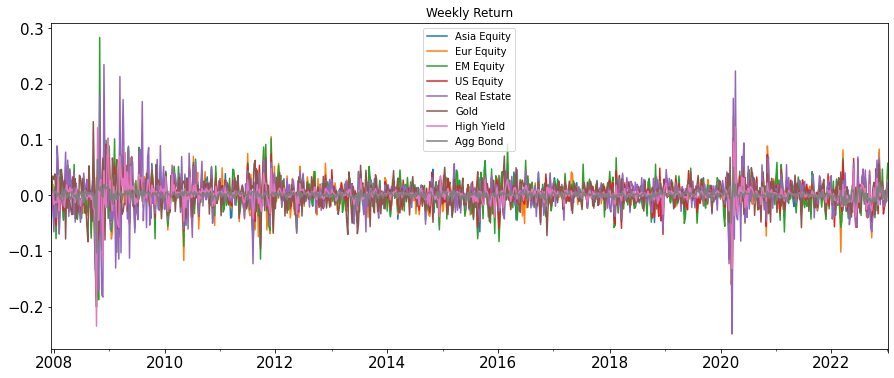

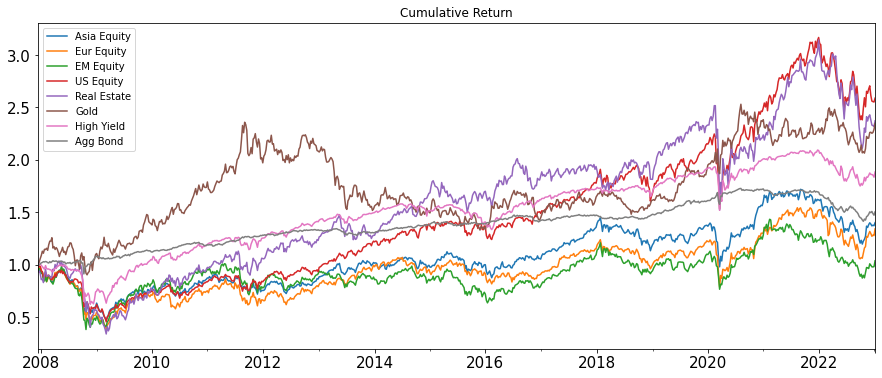

In [17]:
asset_cum_returns = (1 + asset_returns).cumprod()
# plot the returns
asset_returns.plot(figsize = (15, 6), title = 'Weekly Return')
asset_cum_returns.plot(figsize = (15, 6), title = 'Cumulative Return')

# Asset Class Performance

In [18]:
asset_perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown'])
# calculate performance
asset_perf['return'] = asset_cum_returns.iloc[-1] ** (1/(asset_cum_returns.shape[0]/52)) - 1
asset_perf['vol'] = asset_returns.std() * np.sqrt(52)
asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
asset_perf['Max Drawdown'] = (1 - asset_cum_returns/asset_cum_returns.cummax()).max()
asset_perf

,return,vol,Sharpe,Max Drawdown
Asia Equity,0.022490,0.185600,0.121173,0.515013
Eur Equity,0.019563,0.229438,0.085265,0.609026
EM Equity,0.002383,0.247778,0.009616,0.612241
US Equity,0.064863,0.189977,0.341423,0.539644
Real Estate,0.058732,0.277228,0.211856,0.672700
Gold,0.057979,0.174700,0.331880,0.436303
High Yield,0.042741,0.135536,0.315348,0.383676
Agg Bond,0.027307,0.054570,0.500393,0.181742


In [19]:
def calc_perf(returns, turnovers = None, plot_flag = False):
    
    ## remove NA data
    returns = returns.dropna(axis = 0)
    if isinstance(returns, pd.Series):
        if returns.name is None:
            returns.name = 'portfolio'      
        returns = returns.to_frame()
    
    ## Locate the inital starting point of the return data
    # defined as the first non-zero value
    starting_index = np.where(returns.sum(1) != 0)[0][0]
    starting_index = max(starting_index - 1, 0)
    returns = returns.iloc[starting_index:]
    
    ## Initiate the performance dataframe
    asset_perf = pd.DataFrame(0, dtype = float, 
                              index = returns.columns,
                              columns = ['return','vol','Sharpe','Max Drawdown', 'Turnovers'])

    ## Calculate perfomrance
    cum_returns = (returns + 1).cumprod()
    asset_perf['return'] = cum_returns.iloc[-1] ** (1/(cum_returns.shape[0]/52)) - 1
    asset_perf['vol'] = returns.std() * np.sqrt(52)
    asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
    asset_perf['Max Drawdown'] = (1 - cum_returns/cum_returns.cummax()).max()
    
    ## Add turnover Rate
    if turnovers is not None:
        if isinstance(turnovers, pd.Series):
            if turnovers.name is None:
                turnovers.name = 'portfolio'   
            turnovers = turnovers.to_frame()
        turnovers = turnovers.loc[returns.index]
        asset_perf['Turnovers'] = turnovers.mean() * 52
    
    ## Plot the charts
    if plot_flag:
        ax = cum_returns.plot(figsize = (15, 6))
        ax.set_title('Cumulative Return',  fontsize = 16)
        ax.tick_params(axis='x', labelsize = 12)
        ax.tick_params(axis='y', labelsize = 12)
        plt.legend(returns.columns + ' - Sharpe:' + asset_perf['Sharpe'].round(2).astype(str).values, fontsize = 12.5)

    return asset_perf

,return,vol,Sharpe,Max Drawdown,Turnovers
Asia Equity,0.02249,0.1856,0.121173,0.515013,0.0


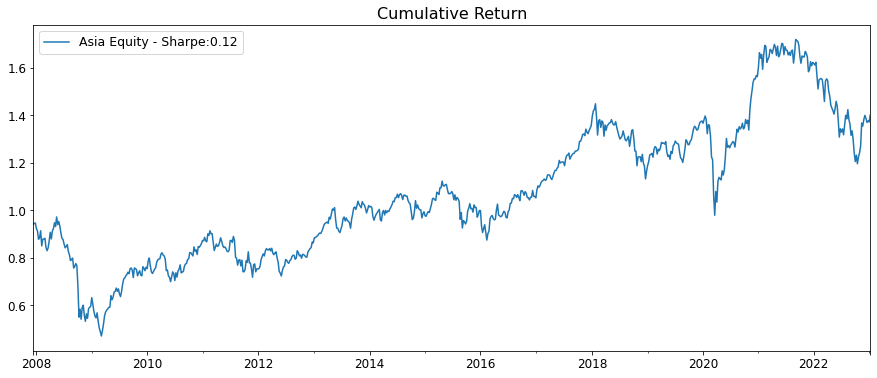

In [20]:
# generate performance of Asia Equity
calc_perf(asset_returns['Asia Equity'], plot_flag = True)

,return,vol,Sharpe,Max Drawdown,Turnovers
Asia Equity,0.022490,0.185600,0.121173,0.515013,0.0
Eur Equity,0.019563,0.229438,0.085265,0.609026,0.0
EM Equity,0.002383,0.247778,0.009616,0.612241,0.0
US Equity,0.064863,0.189977,0.341423,0.539644,0.0
Real Estate,0.058732,0.277228,0.211856,0.672700,0.0
Gold,0.057979,0.174700,0.331880,0.436303,0.0
High Yield,0.042741,0.135536,0.315348,0.383676,0.0
Agg Bond,0.027307,0.054570,0.500393,0.181742,0.0


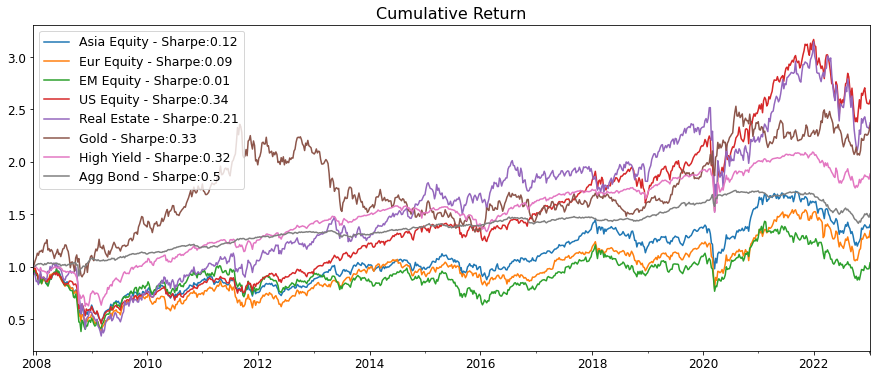

In [21]:
# generate performance of all asset classes
asset_perf = calc_perf(asset_returns,  plot_flag = True)
asset_perf

# Rebalance Algo Template

In [22]:
# 60/40 portfolio
def calc_weight_60_40(asset_returns,  # return data
                      ind,            # date
                      prev_weights,   # pre-reb weights
                      args = {},      # additional arguments
                     ):  
    new_weights = {'Asia Equity':0.04, 
                   'Eur Equity':0.04,
                   'EM Equity':0.04,
                   'US Equity':0.48,
                   'Real Estate':0,
                   'Gold':0,
                   'High Yield':0.08,
                   'Agg Bond':0.32}
    return pd.Series(new_weights)

In [23]:
new_port = calc_weight_60_40(asset_returns = 1231241,
                  ind = 52152,          
                  prev_weights = 22,
                  args = {} 
                 )
new_port

Asia Equity    0.04
Eur Equity     0.04
EM Equity      0.04
US Equity      0.48
Real Estate    0.00
Gold           0.00
High Yield     0.08
Agg Bond       0.32
dtype: float64

# BackTest Framework

In [24]:
def create_backtest(asset_returns = asset_returns, 
                    rebalance_freq = 'monthly', # monthly or weekly or quarterly
                    calc_target_weight = None,  # rebalance function
                    args = {},                  # additional arguments
                    starting_week = 0,          # the starting week of backtest
                    portfolio_name = 'portfolio'):
    
    start_time = time.time()
    
    # initiation
    temp_return = pd.Series(0, dtype = float, index = asset_returns.index, name = portfolio_name)
    temp_turnover = pd.Series(0, dtype = float, index = asset_returns.index, name = portfolio_name)
    temp_weights = pd.DataFrame(0, dtype = float, index = asset_returns.index, columns = asset_returns.columns)
     
    # starting backtgest
    print('Starting to Create Backtest...')

    last_ind = None   # date of last week
    
    for i, ind in enumerate(asset_returns.index):
        
        # move on to next date if i < starting_week
        if i < starting_week:
            last_ind = ind
            continue
        
        if last_ind is not None and ind.year != last_ind.year and ind.year % 2 == 0:
            print(('{:s}, Time Used: {:.2f} seconds, Current Cumulative Return: {:.2f}').format(
                ind.strftime('%Y'), (time.time() - start_time), temp_return.loc[:ind].sum()))
            
        # calcualte returns and drifted weights
        if i > starting_week:
            temp_return.loc[ind] = np.sum(temp_weights.loc[last_ind] * asset_returns.loc[ind])
            temp_weights.loc[ind] = temp_weights.loc[last_ind] * (
                1 + asset_returns.loc[ind])/(1 + np.sum(temp_weights.loc[last_ind] * asset_returns.loc[ind]))

        # check if rebalance is needed
        if i == starting_week or \
           (rebalance_freq == 'quarterly' and (i < asset_returns.shape[0] - 1) and (asset_returns.index[i + 1].quarter != ind.quarter)) or \
           (rebalance_freq == 'monthly' and (i < asset_returns.shape[0] - 1) and (asset_returns.index[i + 1].month != ind.month)) or \
           (rebalance_freq == 'weekly'):
      
            prev_weights = temp_weights.loc[ind].copy()
            # rebalance to new weights
            temp_weights.loc[ind] = calc_target_weight(asset_returns = asset_returns, 
                                                       ind = ind,
                                                       prev_weights = prev_weights, 
                                                       args = args)
            temp_turnover.loc[ind] = np.sum(np.abs(temp_weights.loc[ind] - prev_weights))
            
        last_ind = ind
        
    print('Finished! Total Time Used: {:.2f} seconds\n'.format(time.time() - start_time))
    
    return temp_return, temp_weights, temp_turnover

Starting to Create Backtest...
2008, Time Used: 0.01 seconds, Current Cumulative Return: 0.01
2010, Time Used: 0.17 seconds, Current Cumulative Return: -0.04
2012, Time Used: 0.33 seconds, Current Cumulative Return: 0.09
2014, Time Used: 0.48 seconds, Current Cumulative Return: 0.33
2016, Time Used: 0.63 seconds, Current Cumulative Return: 0.40
2018, Time Used: 0.78 seconds, Current Cumulative Return: 0.61
2020, Time Used: 0.94 seconds, Current Cumulative Return: 0.75
2022, Time Used: 1.09 seconds, Current Cumulative Return: 1.02
Finished! Total Time Used: 1.17 seconds



,return,vol,Sharpe,Max Drawdown,Turnovers
portfolio,0.050931,0.125723,0.405107,0.37572,0.28332


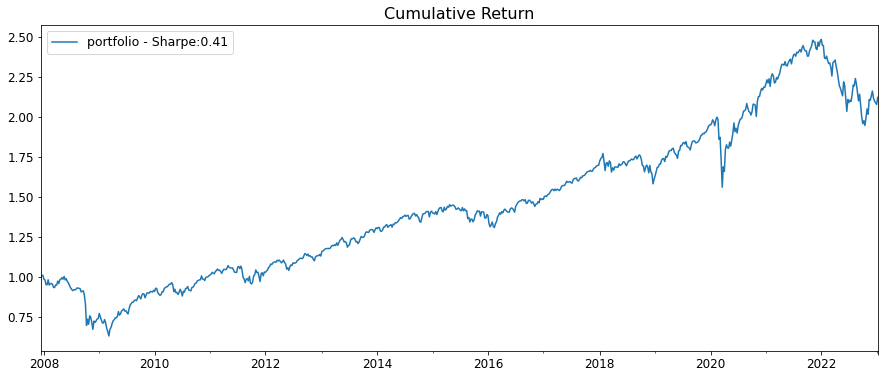

In [25]:
temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_weight_60_40,
    args = {},
    starting_week = 0)
calc_perf(temp_return,temp_turnover, plot_flag = True)

# Enhanced MVO Model

In [26]:
perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

## V1: Standard MVO

In [27]:
def calc_MVO_weights(asset_returns,   # asset class return data
                     ind,             # date
                     prev_weights,    # pre-rebalance weights 
                     args = {
                             'lookback_window_min': 52 * 10,        # minimum # of weeks required to build the model
                             'opt': {},                             # parameter for the optimizer: lambda
                             }):
    
    input_return_data = asset_returns.loc[:ind]                     # latest asset return data up to ind
    if input_return_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                         # return if there is not enough data
    
    # prepare the input variables
    # r and sigma
    returns_temp = input_return_data.mean() * 52
    covs_temp = input_return_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w)  # objective function 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]  # sum of weights = 1
    bounds = [(0, 1) for w in prev_weights]               # upper and lower bound for each asset class

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [28]:
lookback_window_min = 52 * 10
rp = 10

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'lookback_window_min': lookback_window_min, 
            'opt':(rp)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.11 seconds, Current Cumulative Return: 0.00
2020, Time Used: 1.10 seconds, Current Cumulative Return: 0.11
2022, Time Used: 1.83 seconds, Current Cumulative Return: 0.22
Finished! Total Time Used: 2.18 seconds



      return       vol    Sharpe  Max Drawdown  Turnovers
V1  0.020013  0.071486  0.279963      0.169127   0.503747


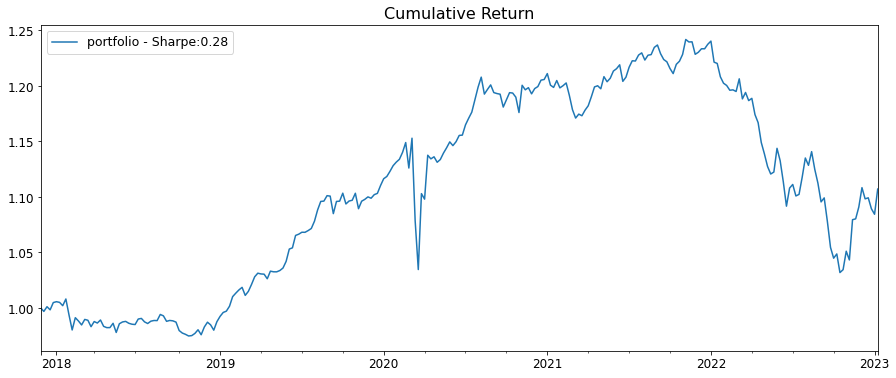

In [29]:
perf.loc['V1'] = calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

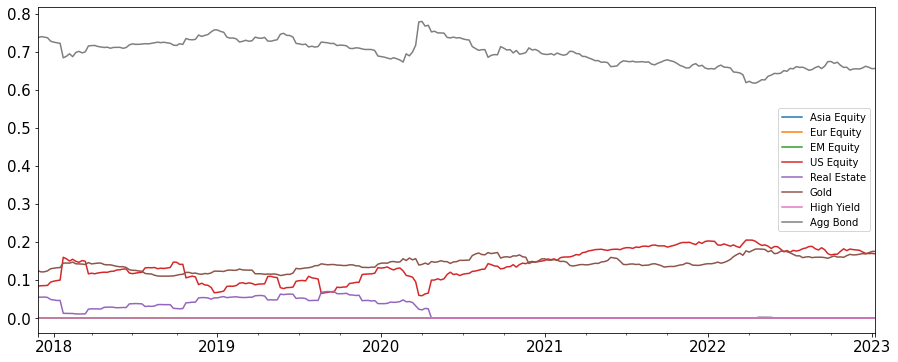

In [30]:
temp_weights.iloc[52 * 10:].plot(figsize = (15, 6))

## V1.5 V1 + Winsorization

In [31]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,                    # the % threshold of winsorization
                             'lookback_window_min': 52 * 10, 
                             'opt': {},
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data

    if args['winsor'] > 0:                                  
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [(0, 1) for w in prev_weights]

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [32]:
lookback_window_min = 52 * 10
rp = 10
winsor = 0.01

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': winsor,
            'lookback_window_min': lookback_window_min, 
            'opt':(rp)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.11 seconds, Current Cumulative Return: 0.00
2020, Time Used: 1.26 seconds, Current Cumulative Return: 0.10
2022, Time Used: 2.39 seconds, Current Cumulative Return: 0.22
Finished! Total Time Used: 2.99 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.503747
V1.5  0.016359  0.073802  0.221653      0.177852   0.716340


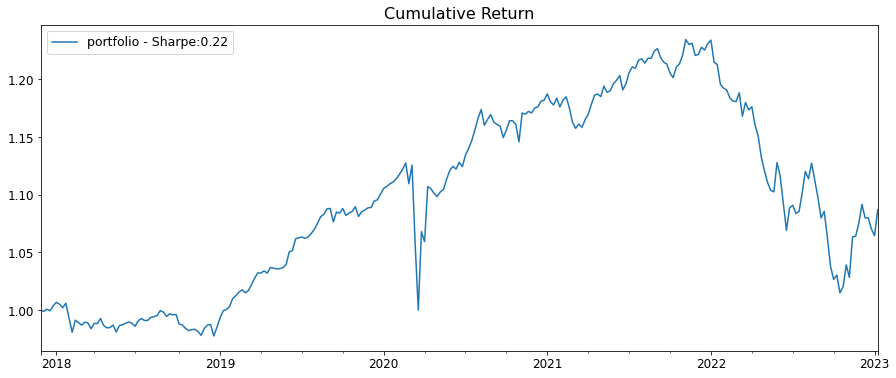

In [33]:
perf.loc['V1.5'] = calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

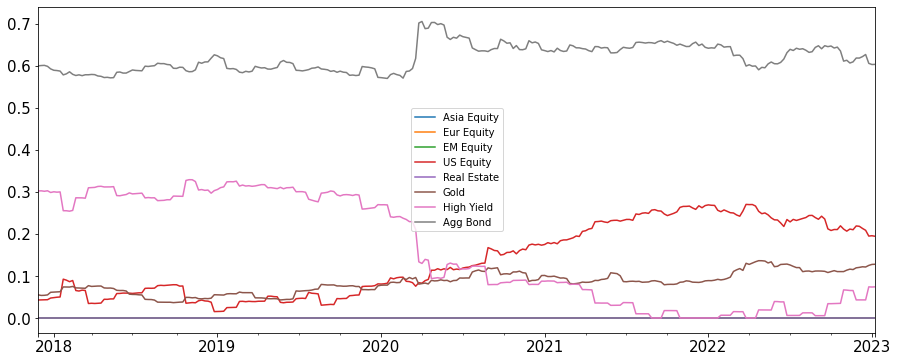

In [34]:
temp_weights.iloc[52 * 10:].plot(figsize = (15, 6))

## V2: V1.5 + Notional Control

In [35]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),        # upper and lower bound for each asset class
                             'notional_constraints': False,  # Flag for notional constraints
                             'notional_constraints_A':None,  # A in Aw - b >= 0
                             'notional_constraints_b':None,  # b in Aw - b >= 0
                             'opt': {},
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data
    
    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [asset_min_max for w in prev_weights]
    
    if args['notional_constraints']:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [36]:
# setup notional control
equity_index = np.where(asset_returns.columns.isin(['Asia Equity', 'Eur Equity', 'EM Equity', 'US Equity']))[0]
gold_index =  np.where(asset_returns.columns.isin(['Gold']))[0]
realestate_index =  np.where(asset_returns.columns.isin(['Real Estate']))[0]
fixedincome_index = np.where(asset_returns.columns.isin(['High Yield', 'Agg Bond']))[0]

## notional constraints
# A @ x - b >= 0 
notional_constraints = True
A = np.zeros([2 + 2 + 2 + 2, asset_returns.shape[1]])
A[0, equity_index] = 1        # min equity
A[1, equity_index] = -1       # max equity
A[2, fixedincome_index] = 1   # min fixed income
A[3, fixedincome_index] = -1  # max fixed income
A[4, gold_index] = 1          # min gold 
A[5, gold_index] = -1         # max gold 
A[6, realestate_index] = 1    # min real estate 
A[7, realestate_index] = -1   # max real estate  
b = np.array([0.5, -0.7,    # equity min and max
              0.3, -0.5,    # fixed income
              0,   -0.2,    # gold
              0,   -0.2])   # real estate

## allocation boundaries on each asset class
asset_min_max = (0.02, 0.4)

In [37]:
lookback_window_min = 52 * 10
rp = 10

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': 0,
            'lookback_window_min': lookback_window_min, 
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
            'opt':(rp)},
    starting_week = 52 * 10)


Starting to Create Backtest...
2018, Time Used: 0.07 seconds, Current Cumulative Return: 0.01
2020, Time Used: 0.73 seconds, Current Cumulative Return: 0.15
2022, Time Used: 1.38 seconds, Current Cumulative Return: 0.40
Finished! Total Time Used: 1.72 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.503747
V1.5  0.016359  0.073802  0.221653      0.177852   0.716340
V2    0.047595  0.118363  0.402111      0.204417   0.493663


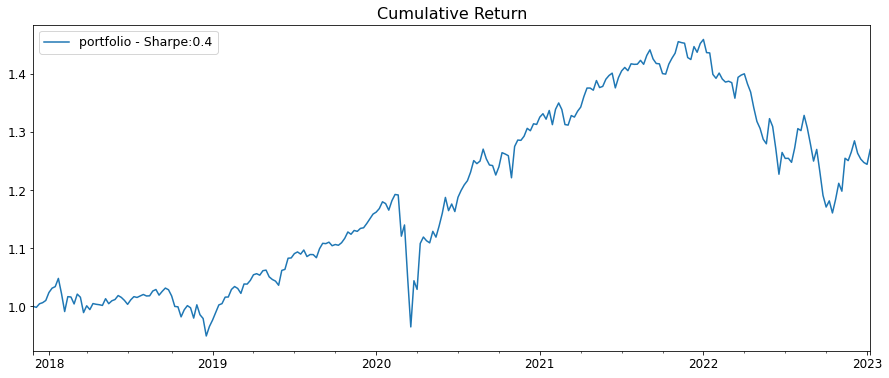

In [38]:
perf.loc['V2']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

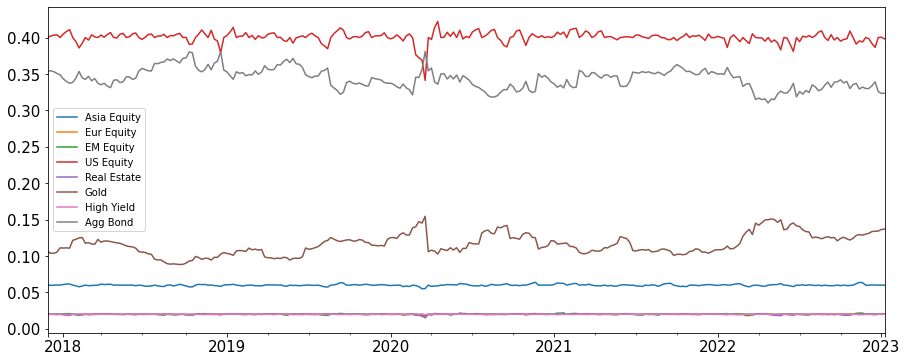

In [39]:
temp_weights.iloc[52 * 10:].plot(figsize = (15, 6))

## V3: V2 + Turnover Awareness

In [40]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),
                             'notional_constraints': False,
                             'notional_constraints_A':None,
                             'notional_constraints_b':None,
                             'opt': {},                      # parameters for optimizer: lambda and gamma
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data
    
    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
    
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    if prev_weights.sum() > 0:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) + \
                    turnover_pan * np.sum(np.square(w - prev_weights.values))
    else:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [asset_min_max for w in prev_weights]
    
    if args['notional_constraints']:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)



In [41]:
lookback_window_min = 52 * 10
rp = 10
turnover_pan = 100

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': 0,
            'lookback_window_min': lookback_window_min, 
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
            'opt':(rp, turnover_pan)},
  starting_week = 52 * 10)


Starting to Create Backtest...
2018, Time Used: 0.09 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.58 seconds, Current Cumulative Return: 0.15
2022, Time Used: 2.97 seconds, Current Cumulative Return: 0.41
Finished! Total Time Used: 3.56 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.503747
V1.5  0.016359  0.073802  0.221653      0.177852   0.716340
V2    0.047595  0.118363  0.402111      0.204417   0.493663
V3    0.047987  0.121254  0.395755      0.211041   0.299901


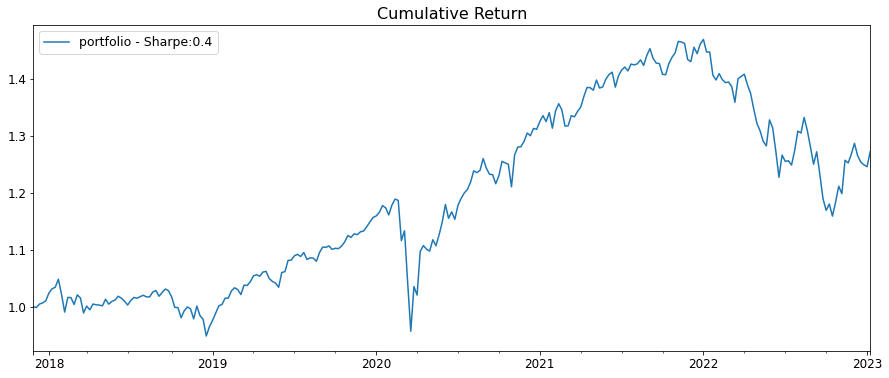

In [42]:
perf.loc['V3']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

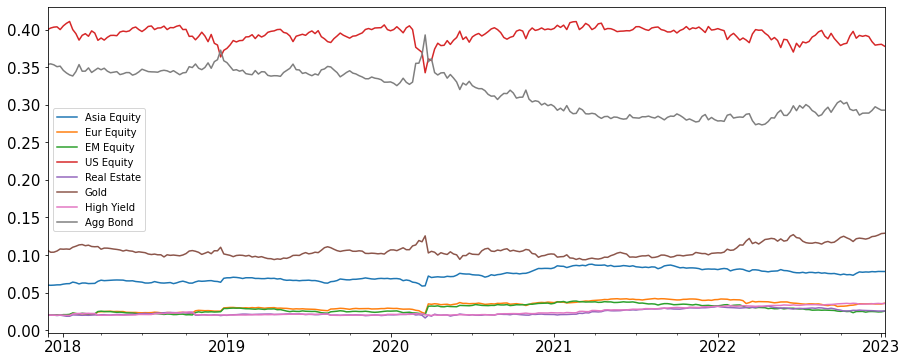

In [43]:
temp_weights.iloc[52 * 10:].plot(figsize = (15, 6))

## V4: V3 + Risk Control (Full Model)

In [44]:
rc_lookback_window = 52 * 10
def calc_risk_contribution(asset_cov, weights):
    temp_rc = weights * (asset_cov @ weights) / \
                 np.sqrt(weights.T @ asset_cov @ weights)  
    return temp_rc

def plot_stacked_area_chart(df, ax):
    import warnings
    warnings.filterwarnings('ignore')
    # split prc into negative only and positive only values
    df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
    # stacked area plot of positive values
    df_pos.plot.area(ax=ax, stacked=True, linewidth=0.)
    # reset the color cycle
    ax.set_prop_cycle(None)
    # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
    df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0.)
    # rescale the y axis
    ax.set_ylim([df_neg.sum(axis=1).min(), df_pos.sum(axis=1).max()])
    
    
def risk_contribution(asset_returns, portfolio_weights, plot_flag = False):
    rc = pd.DataFrame(dtype = float, index = asset_returns.index, columns = asset_returns.columns)
    prc = pd.DataFrame(dtype = float, index = asset_returns.index, columns = asset_returns.columns)
    for i in range(rc_lookback_window, asset_returns.shape[0]):
        input_return = asset_returns.iloc[:i + 1]
        input_cov = input_return.cov() * 52
        rc.iloc[i] = calc_risk_contribution(input_cov, portfolio_weights.iloc[i])
    prc = rc.div(rc.sum(1), axis = 0)
    if plot_flag:
        starting_index = np.where(rc.sum(1)!=0)[0][0] - 1
        starting_index = max(starting_index, 0)
        starting_index = rc.index[starting_index]
        fig, ax = plt.subplots(3, 2, figsize = (15, 15))
        plot_stacked_area_chart(portfolio_weights.loc[starting_index:], ax[0][0])
        ax[0][0].set_title('Allocation',  fontsize = 16)
        ax[0][0].tick_params(axis='x', labelsize = 13)
        ax[0][0].tick_params(axis='y', labelsize = 13)
        
        plot_stacked_area_chart(rc.loc[starting_index:], ax[0][1])
        ax[0][1].set_title('Risk Contribution',  fontsize = 16)
        ax[0][1].tick_params(axis='x', labelsize = 13)
        ax[0][1].tick_params(axis='y', labelsize = 13)
        
        plot_stacked_area_chart(prc.loc[starting_index:], ax[1][0])
        ax[1][0].set_title('% Risk Contribution',  fontsize = 16)
        ax[1][0].tick_params(axis='x', labelsize = 13)
        ax[1][0].tick_params(axis='y', labelsize = 13)
        
        prc.loc[starting_index:].mean().plot(kind='bar', ax = ax[1][1])
        ax[1][1].set_title('Average % Risk Contribution',  fontsize = 16)
        ax[1][1].tick_params(axis='x', labelsize = 13)
        ax[1][1].tick_params(axis='y', labelsize = 13)

        chart_data = pd.DataFrame(index = prc.index, columns = ['Total Equity','Total Fixed Income'])
        chart_data['Total Equity'] = prc.iloc[:,equity_index].sum(1)
        chart_data['Total Fixed Income'] = prc.iloc[:,fixedincome_index].sum(1)
        chart_data.loc[starting_index:].plot(ax = ax[2][0])
        ax[2][0].set_title('% Risk Contribution',  fontsize = 16)
        ax[2][0].tick_params(axis='x', labelsize = 13)
        ax[2][0].tick_params(axis='y', labelsize = 13)
        ax[2][0].legend(fontsize = 13)
                  
        prc.iloc[:,[gold_index[0], realestate_index[0]]].loc[starting_index:].plot(ax = ax[2][1])
        ax[2][1].set_title('% Risk Contribution',  fontsize = 16)
        ax[2][1].tick_params(axis='x', labelsize = 13)
        ax[2][1].tick_params(axis='y', labelsize = 13)
        ax[2][1].legend(fontsize = 13)
        
        plt.tight_layout()

    return rc, prc


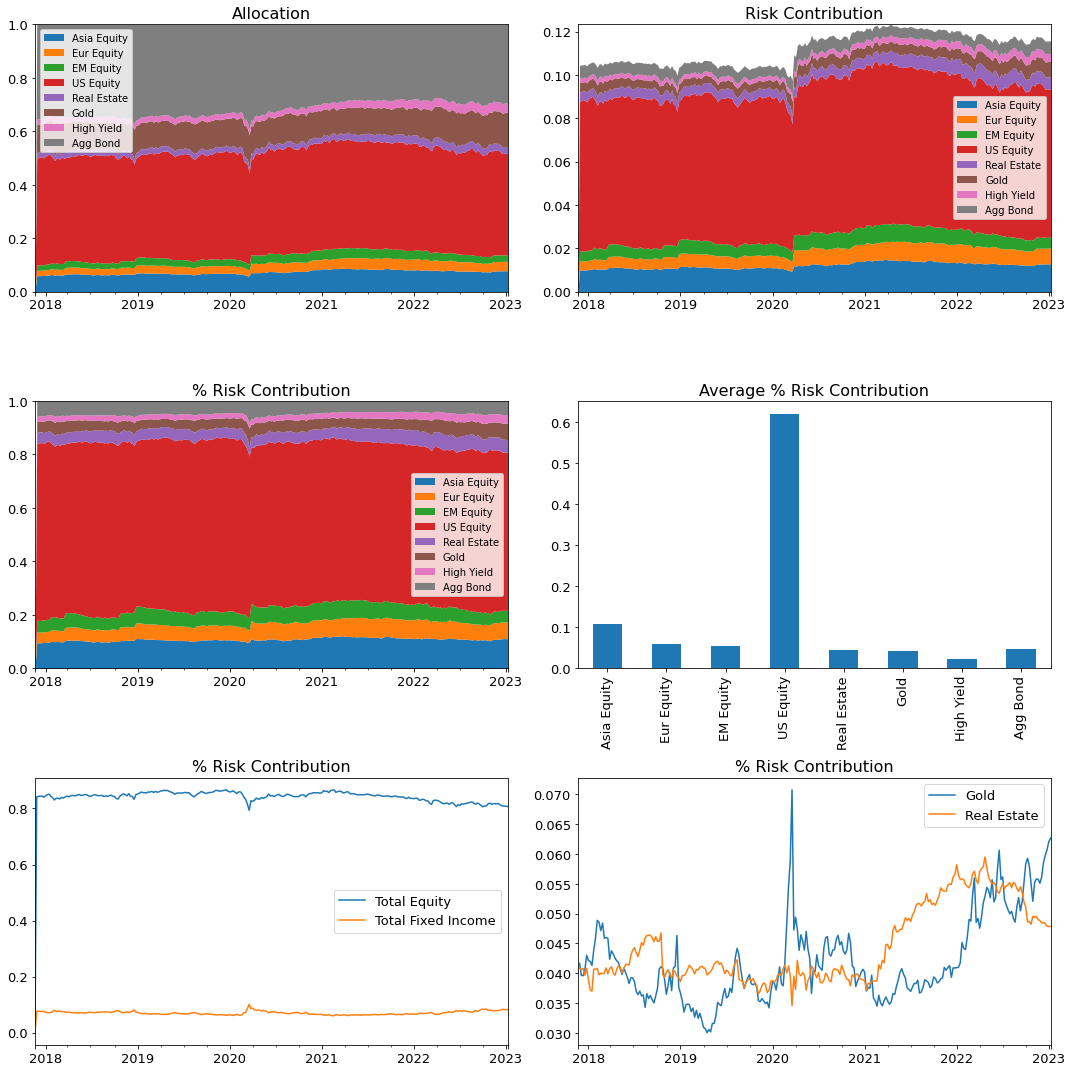

In [45]:
rc, prc = risk_contribution(asset_returns, temp_weights, plot_flag = True)

In [46]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0, 
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),
                             'notional_constraints': False,
                             'notional_constraints_A':None,
                             'notional_constraints_b':None,
                             'risk_constraints':False,
                             'risk_constraints_A':None,
                             'risk_constraints_b':None,
                             'opt':None}):
    
    input_data = asset_returns.loc[:ind]                        # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:       # check if there is enough data points
        return prev_weights                                     # return if there is not enough data

    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    if prev_weights.sum() > 0:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) + \
                    turnover_pan * np.sum(np.square(w - prev_weights.values))
    else:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [asset_min_max for w in prev_weights]
    
    if args['notional_constraints'] == 1:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    
    if args['risk_constraints'] == 1: 
        RC = lambda w: args['risk_constraints_A'] @ ((w * (covs_temp @ w)) /(w.T @ covs_temp @ w)) \
                - args['risk_constraints_b']
        cons += [{'type':'ineq', 'fun': RC}]

    initial_guss = prev_weights.copy()
    
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [47]:
## risk constraints
# A @ f(w) - b >= 0 
risk_constraints = 1
risk_constraints_b = np.array([0,   -0.7,    # equity risk min and max
                               0,   -0.2,    # fixed income risk
                               0,   -0.1,    # gold risk
                               0,   -0.1])   # real estate risk


In [48]:
temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor':winsor,
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
             'risk_constraints': risk_constraints,
             'risk_constraints_A': A,
             'risk_constraints_b': risk_constraints_b,
            'lookback_window_min': lookback_window_min, 
            'opt':(rp, turnover_pan)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.14 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.10 seconds, Current Cumulative Return: 0.17
2022, Time Used: 6.05 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 7.72 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.503747
V1.5  0.016359  0.073802  0.221653      0.177852   0.716340
V2    0.047595  0.118363  0.402111      0.204417   0.493663
V3    0.047987  0.121254  0.395755      0.211041   0.299901
V4    0.054281  0.141174  0.384500      0.238394   0.365717


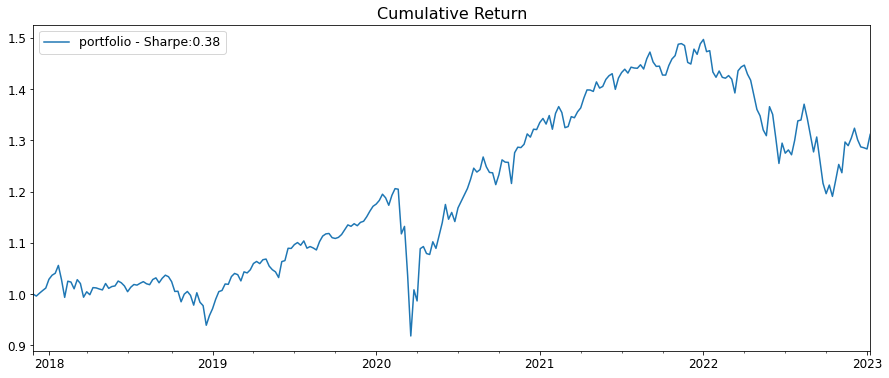

In [49]:
perf.loc['V4']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

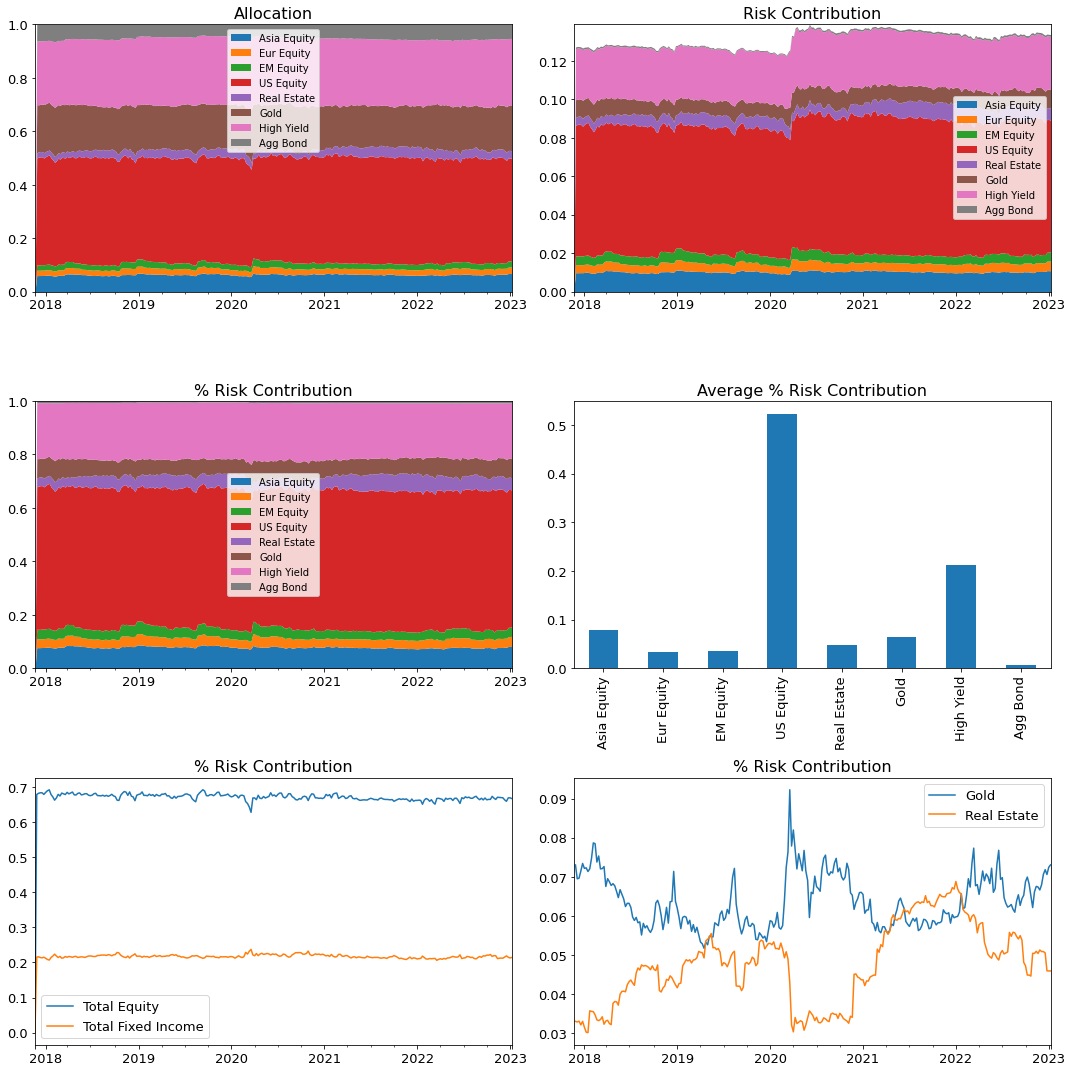

In [50]:
rc, prc = risk_contribution(asset_returns, temp_weights, plot_flag = True)

# Robustness Test

## Robustness Testing: Risk Penalty

In [159]:
perf =  pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

for rp in range(1, 20):
    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                 'risk_constraints': risk_constraints,
                                 'risk_constraints_A': A,
                                 'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                        starting_week = 52 * 10)
    perf.loc[rp] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]
    print(perf.loc[rp])

Starting to Create Backtest...
2018, Time Used: 0.22 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.04 seconds, Current Cumulative Return: 0.16
2022, Time Used: 5.89 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 7.11 seconds

return          0.054424
vol             0.142982
Sharpe          0.380637
Max Drawdown    0.239179
Turnovers       0.319450
Name: 1, dtype: float64
Starting to Create Backtest...
2018, Time Used: 0.18 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.48 seconds, Current Cumulative Return: 0.16
2022, Time Used: 6.47 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 7.82 seconds

return          0.054473
vol             0.142879
Sharpe          0.381254
Max Drawdown    0.239057
Turnovers       0.321234
Name: 2, dtype: float64
Starting to Create Backtest...
2018, Time Used: 0.22 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.51 seconds, Current Cumulative Return: 0.16
2022, Time Used: 6.41 s

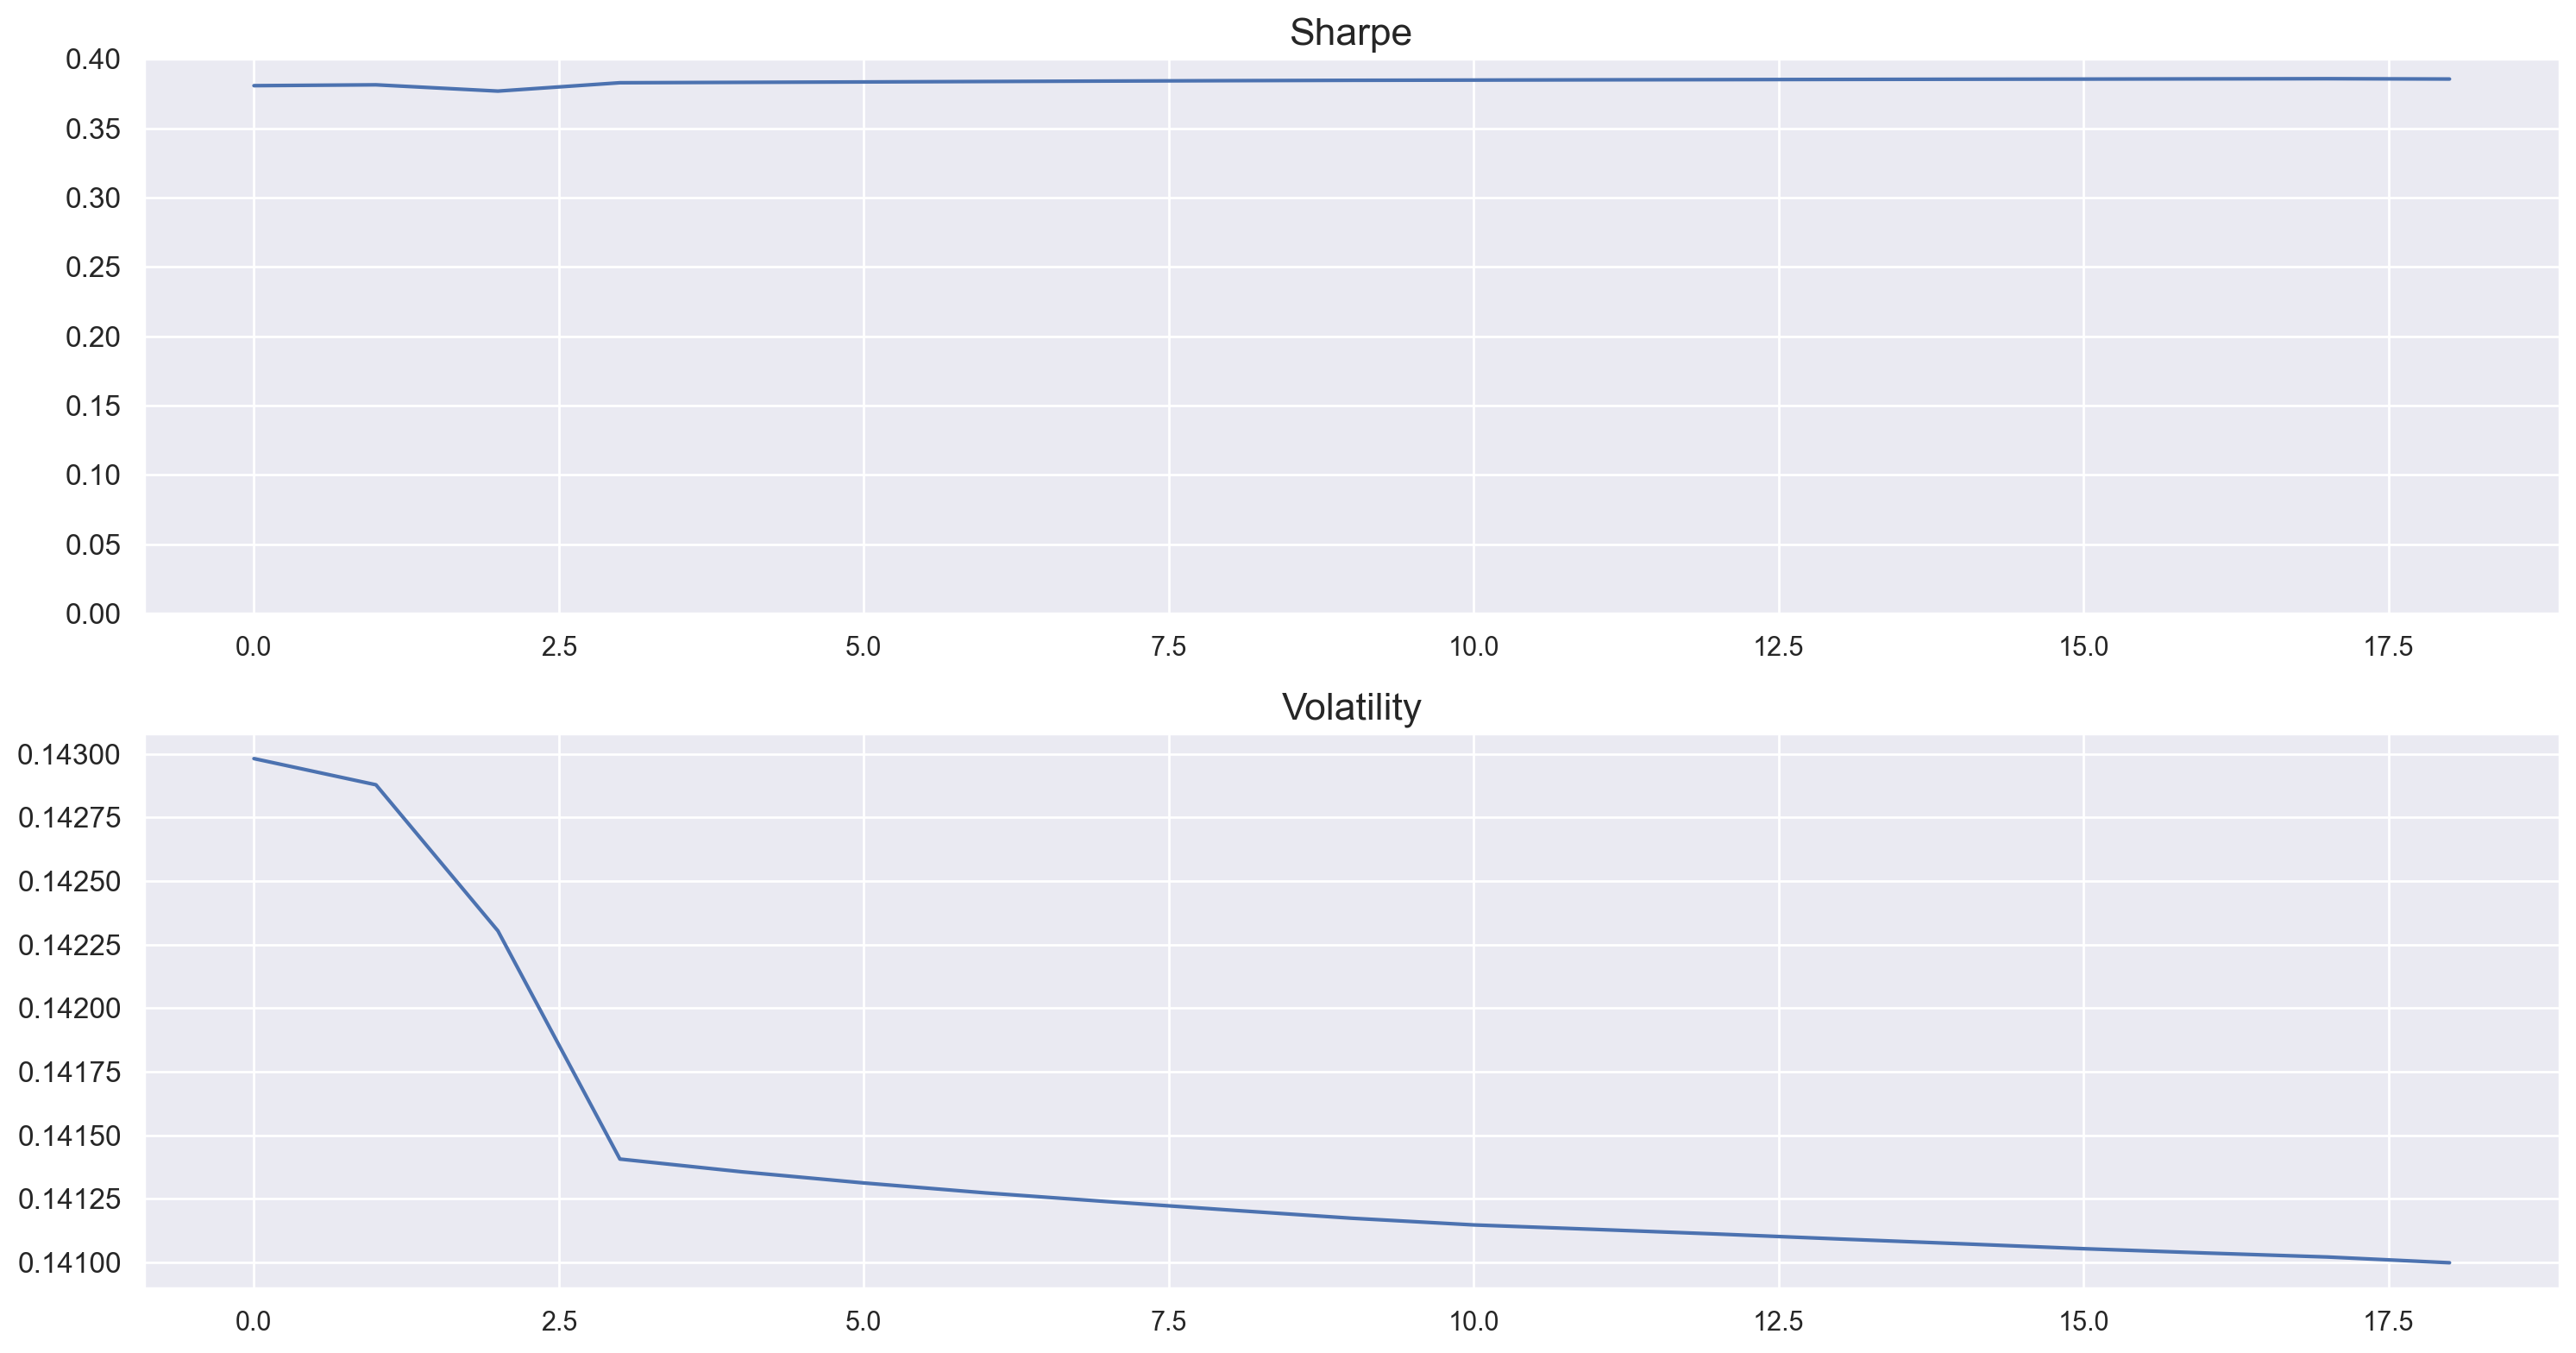

In [160]:
fig, ax = plt.subplots(2, 1, figsize = (15, 8), dpi = 200)
ax[0].plot(range(perf.shape[0]), perf['Sharpe'])
ax[0].set_ylim([0, 0.4])
ax[0].set_title('Sharpe',  fontsize = 16)
#ax[0].get_xaxis().set_ticks([])
ax[0].tick_params(axis='y', labelsize = 12)
ax[1].plot(range(perf.shape[0]), perf['vol'])
ax[1].set_title('Volatility',  fontsize = 16)
#ax[1].get_xaxis().set_ticks([])
ax[1].tick_params(axis='y', labelsize = 12)
plt.tight_layout()

## Robustness Testing: Turnover Penalty

In [161]:
perf =  pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

for turnover_pan in [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.7,] + list(range(1, 100, 5)):
    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                 'risk_constraints': risk_constraints,
                                 'risk_constraints_A': A,
                                 'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                         starting_week = 52)
    perf.loc[turnover_pan] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]
    print(perf.loc[turnover_pan])

Starting to Create Backtest...
2010, Time Used: 0.17 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.31 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.45 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.60 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.88 seconds, Current Cumulative Return: 0.01
2020, Time Used: 2.28 seconds, Current Cumulative Return: 0.17
2022, Time Used: 3.54 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 4.30 seconds

return          0.055245
vol             0.139879
Sharpe          0.394946
Max Drawdown    0.236086
Turnovers       0.461191
Name: 0, dtype: float64
Starting to Create Backtest...
2010, Time Used: 0.09 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.25 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.39 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.54 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.82 seconds, Current Cumulative Retur

2020, Time Used: 2.46 seconds, Current Cumulative Return: 0.17
2022, Time Used: 4.13 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 4.98 seconds

return          0.055151
vol             0.140191
Sharpe          0.393400
Max Drawdown    0.236095
Turnovers       0.417456
Name: 11.0, dtype: float64
Starting to Create Backtest...
2010, Time Used: 0.09 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.24 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.39 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.54 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.82 seconds, Current Cumulative Return: 0.01
2020, Time Used: 2.75 seconds, Current Cumulative Return: 0.17
2022, Time Used: 4.78 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 5.77 seconds

return          0.055359
vol             0.140226
Sharpe          0.394786
Max Drawdown    0.236110
Turnovers       0.411089
Name: 16.0, dtype: float64
Starting to Crea

2012, Time Used: 0.24 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.39 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.53 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.80 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.63 seconds, Current Cumulative Return: 0.17
2022, Time Used: 6.32 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 7.79 seconds

return          0.054650
vol             0.140658
Sharpe          0.388530
Max Drawdown    0.237883
Turnovers       0.375901
Name: 76.0, dtype: float64
Starting to Create Backtest...
2010, Time Used: 0.08 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.22 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.37 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.52 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.79 seconds, Current Cumulative Return: 0.01
2020, Time Used: 3.66 seconds, Current Cumulative Return: 0.17
2022, Time Used: 6.2

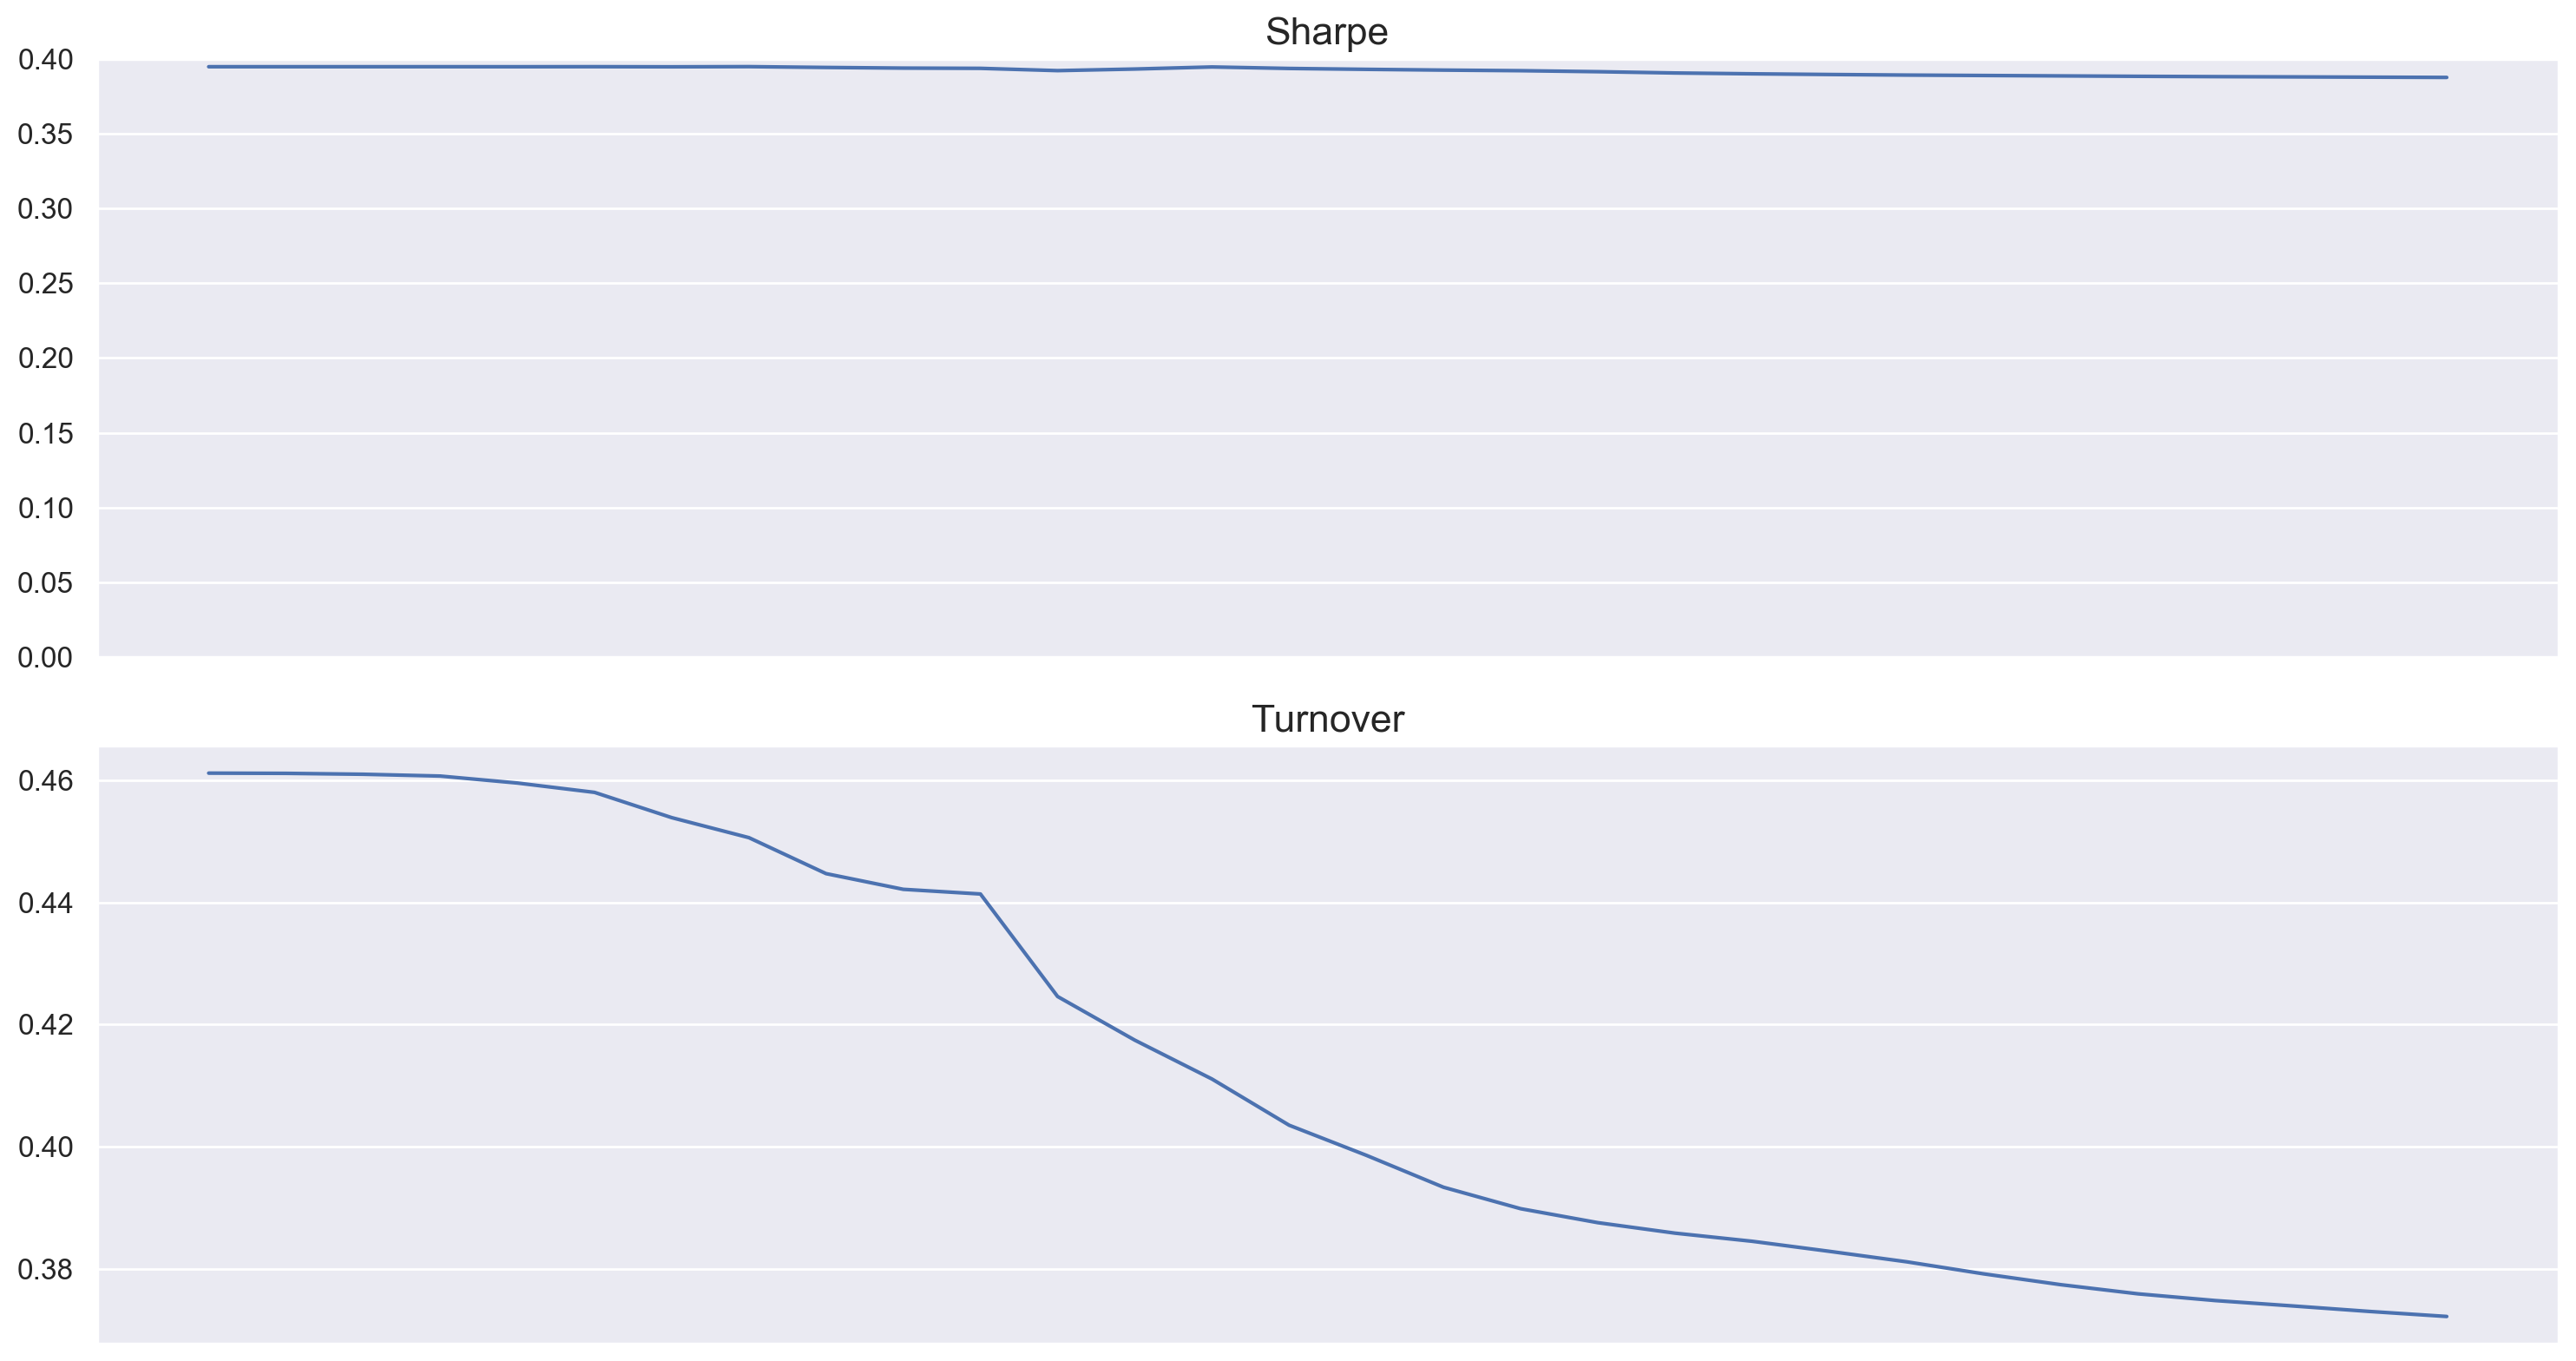

In [162]:
fig, ax = plt.subplots(2, 1, figsize = (15, 8), dpi = 200)
ax[0].plot(range(perf.shape[0]), perf['Sharpe'])
ax[0].set_title('Sharpe',  fontsize = 16)
ax[0].set_ylim([0, 0.4])
ax[0].get_xaxis().set_ticks([])
ax[0].tick_params(axis='y', labelsize = 12)
ax[1].plot(range(perf.shape[0]), perf['Turnovers'])
ax[1].set_title('Turnover',  fontsize = 16)
ax[1].get_xaxis().set_ticks([])
ax[1].tick_params(axis='y', labelsize = 12)
plt.tight_layout()

## Robustness Testing: Backtest Window

In [163]:
perf = pd.DataFrame(dtype = float, columns = ['60/40','mvo'])

for lookback_window_min in [52, 52*3, 52*5, 52*7, 52*10, 52*12]:
    temp_return, temp_weights, temp_turnover = create_backtest(
            asset_returns = asset_returns, 
            rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
            calc_target_weight = calc_weight_60_40, # rebalance algo
            starting_week = lookback_window_min)
    perf.loc[lookback_window_min, '60/40'] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]['Sharpe']

    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                 'risk_constraints': risk_constraints,
                                 'risk_constraints_A': A,
                                 'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                        starting_week = lookback_window_min)
    perf.loc[lookback_window_min,'mvo'] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]['Sharpe']
print(perf)

Starting to Create Backtest...
2010, Time Used: 0.08 seconds, Current Cumulative Return: 0.25
2012, Time Used: 0.23 seconds, Current Cumulative Return: 0.38
2014, Time Used: 0.38 seconds, Current Cumulative Return: 0.62
2016, Time Used: 0.53 seconds, Current Cumulative Return: 0.69
2018, Time Used: 0.68 seconds, Current Cumulative Return: 0.90
2020, Time Used: 0.83 seconds, Current Cumulative Return: 1.04
2022, Time Used: 0.98 seconds, Current Cumulative Return: 1.31
Finished! Total Time Used: 1.06 seconds

Starting to Create Backtest...
2010, Time Used: 1.33 seconds, Current Cumulative Return: 0.32
2012, Time Used: 3.54 seconds, Current Cumulative Return: 0.50
2014, Time Used: 6.00 seconds, Current Cumulative Return: 0.69
2016, Time Used: 8.76 seconds, Current Cumulative Return: 0.71
2018, Time Used: 11.65 seconds, Current Cumulative Return: 0.94
2020, Time Used: 14.92 seconds, Current Cumulative Return: 1.08
2022, Time Used: 18.13 seconds, Current Cumulative Return: 1.34
Finished! To

<AxesSubplot:title={'center':'Sharpe'}>

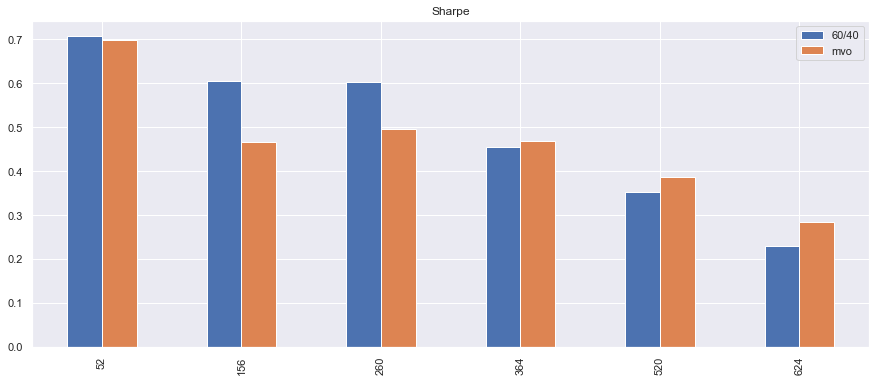

In [164]:
perf.plot(kind = 'bar', figsize = (15, 6), title = 'Sharpe')

# Momentum Overlay

In [165]:
equities = ['Asia Equity', 'Eur Equity', 'EM Equity', 'US Equity']
mom_signal_overlay = asset_returns.shift(4).rolling(48).sum() / \
        (asset_returns.shift(4).rolling(48).std() * np.sqrt(52))
mom_signal_overlay[mom_signal_overlay.columns[~mom_signal_overlay.columns.isin(equities)]] = np.nan
mom_signal_overlay


,Asia Equity,Eur Equity,EM Equity,US Equity,Real Estate,Gold,High Yield,Agg Bond
2007-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-11,-0.801835,-0.474380,-1.092524,-0.585075,NaN,NaN,NaN,NaN
2022-12-18,-0.795432,-0.433960,-0.996308,-0.534136,NaN,NaN,NaN,NaN
2022-12-25,-0.733313,-0.470252,-1.088690,-0.567119,NaN,NaN,NaN,NaN
2023-01-01,-0.651246,-0.430341,-0.850420,-0.555050,NaN,NaN,NaN,NaN


In [166]:
mom_signal_overlay = mom_signal_overlay.rank(axis = 1, pct = 1, ascending = True)
mom_signal_overlay

,Asia Equity,Eur Equity,EM Equity,US Equity,Real Estate,Gold,High Yield,Agg Bond
2007-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-11,0.5,1.0,0.25,0.75,NaN,NaN,NaN,NaN
2022-12-18,0.5,1.0,0.25,0.75,NaN,NaN,NaN,NaN
2022-12-25,0.5,1.0,0.25,0.75,NaN,NaN,NaN,NaN
2023-01-01,0.5,1.0,0.25,0.75,NaN,NaN,NaN,NaN


In [167]:
mom_positions = pd.DataFrame(0, index = mom_signal_overlay.index, columns = mom_signal_overlay.columns)
mom_positions[mom_signal_overlay > 0.5] = 1
mom_positions[mom_signal_overlay <= 0.5] = -1
mom_positions[mom_positions > 0] = mom_positions[mom_positions > 0].div(
    mom_positions[mom_positions > 0].sum(1), axis = 0)
mom_positions[mom_positions < 0] = -mom_positions[mom_positions < 0].div(
    mom_positions[mom_positions < 0].sum(1), axis = 0)
mom_positions

,Asia Equity,Eur Equity,EM Equity,US Equity,Real Estate,Gold,High Yield,Agg Bond
2007-12-16,0.0,0.0,0.0,0.0,0,0,0,0
2007-12-23,0.0,0.0,0.0,0.0,0,0,0,0
2007-12-30,0.0,0.0,0.0,0.0,0,0,0,0
2008-01-06,0.0,0.0,0.0,0.0,0,0,0,0
2008-01-13,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-12-11,-0.5,0.5,-0.5,0.5,0,0,0,0
2022-12-18,-0.5,0.5,-0.5,0.5,0,0,0,0
2022-12-25,-0.5,0.5,-0.5,0.5,0,0,0,0
2023-01-01,-0.5,0.5,-0.5,0.5,0,0,0,0


Starting to Create Backtest...
2010, Time Used: 0.08 seconds, Current Cumulative Return: 0.21
2012, Time Used: 0.24 seconds, Current Cumulative Return: 0.14
2014, Time Used: 0.39 seconds, Current Cumulative Return: 0.26
2016, Time Used: 0.54 seconds, Current Cumulative Return: 0.30
2018, Time Used: 0.68 seconds, Current Cumulative Return: 0.33
2020, Time Used: 0.82 seconds, Current Cumulative Return: 0.44
2022, Time Used: 0.96 seconds, Current Cumulative Return: 0.51
Finished! Total Time Used: 1.03 seconds



,return,vol,Sharpe,Max Drawdown,Turnovers
M,0.034065,0.088991,0.38279,0.141722,5.07838


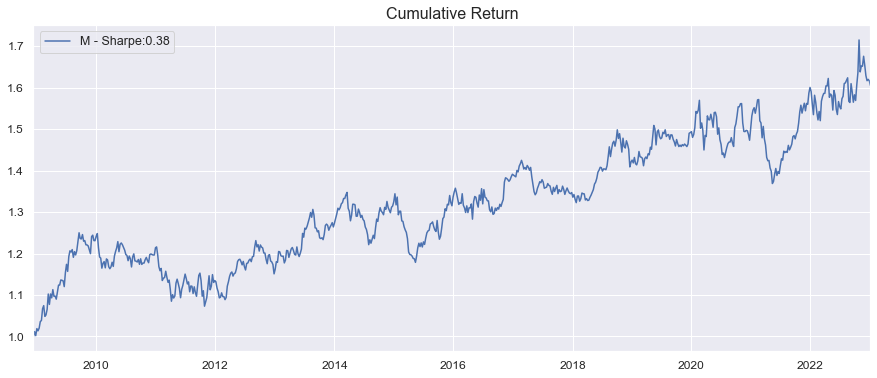

In [168]:
temp_return, temp_weights, temp_turnover  = create_backtest(
        asset_returns = asset_returns, 
        rebalance_freq = 'quarterly', #'monthly or weekly or quarterly'
        calc_target_weight = lambda asset_returns, ind, prev_weights, args: mom_positions.loc[ind], # rebalance algo
        starting_week = 52, portfolio_name = 'M')
calc_perf(temp_return,
          temp_turnover, 
          plot_flag = True)